In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import json
import urllib3.contrib.pyopenssl
import pickle5 as pickle
import sys
import os
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import importlib  

attract_repel = importlib.import_module("attract-repel.code.attract_repel")
grid_search_evaluation = importlib.import_module("attract-repel.code.grid_search_evaluation")

# from attract-repel.code import attract_repel
# from attract-repel.code.grid_search_evaluation import *
from utils.helper_functions import *
from utils.evaluation import *

from tc_data_libs.utils.utils import initNeo4jClient, runPy2neoQuery

sys.path.insert(1, '../../../tc_libraries/motherdb/include')
sys.path.insert(1, '../../../tc_libraries/motherdb/topic_ontology')
import mixedPipeline as mp
from mixedPipelineUtils.performance_measures import measureperformance

# neo4j = initNeo4jClient({'host_neo4j': '51.89.20.204',
#                          'port': 7474, 'user_neo4j': 'neo4j', 'password_neo4j': 'Semantic2020'})


Instructions for updating:
non-resource variables are not supported in the long term
running credentials and query config
args parsed
Namespace(endpoint='https://channelfinder.talentsconnect.com/api/dase/graphql/', garbage=None, token='Basic bmVvNGo6aHVuZA==')
https://channelfinder.talentsconnect.com/api/dase/graphql/
Basic bmVvNGo6aHVuZA==
args parsed
Namespace(endpoint='https://channelfinder.talentsconnect.com/api/dase/tdb/graphql/', garbage=None, token='Basic bmVvNGo6aHVuZA==')
https://channelfinder.talentsconnect.com/api/dase/tdb/graphql/
Basic bmVvNGo6aHVuZA==


## Grid search evaluation of Attract-Repel

In [2]:
directory = "attract-repel/results/grid_search"
attract_repel_results = pd.read_json(directory+'/results.json', orient='records')

attract_repel_results['avg_extrinsic_score'] = (attract_repel_results['roc_score']+attract_repel_results['map_score']+attract_repel_results['max_recall'])/3

attract_repel_results_we = attract_repel_results[attract_repel_results['random']=='False'].reset_index()
attract_repel_results_we['l2'] = attract_repel_results_we['l2'].apply(lambda x: np.round(x,3))
attract_repel_results_we['attract_margin'] = attract_repel_results_we['attract_margin'].apply(lambda x: np.round(x,1))
print(f"The model with the best avg. extrinsic score: \n{attract_repel_results_we.iloc[attract_repel_results_we['avg_extrinsic_score'].idxmax()]}")
print(f"The model with the highest intrinsic score: \n{attract_repel_results_we.iloc[attract_repel_results_we['agreement'].idxmax()]}")

The model with the best avg. extrinsic score: 
index                       103
random                    False
attract_margin         0.300000
batch_size                   50
l2                     0.135000
roc_score              0.709879
map_score              0.301141
map_thresh             0.550000
max_recall             0.544792
recall_thresh                 0
agreement              0.506410
avg_extrinsic_score    0.518604
Name: 103, dtype: object
The model with the highest intrinsic score: 
index                       134
random                    False
attract_margin         0.400000
batch_size                   50
l2                     0.045000
roc_score              0.698428
map_score              0.273438
map_thresh             0.650000
max_recall             0.475000
recall_thresh                 0
agreement              0.720588
avg_extrinsic_score    0.482288
Name: 134, dtype: object


In [3]:
attract_repel_results_random = attract_repel_results[attract_repel_results['random']=='True'].reset_index()
attract_repel_results_random['l2'] = attract_repel_results_random['l2'].apply(lambda x: np.round(x,3))
attract_repel_results_random['attract_margin'] = attract_repel_results_random['attract_margin'].apply(lambda x: np.round(x,1))
print(f"The random model with the best avg. extrinsic score: \n{attract_repel_results_random.iloc[attract_repel_results_random['avg_extrinsic_score'].idxmax()]}")
print(f"The random model with the highest intrinsic score: \n{attract_repel_results_random.iloc[attract_repel_results_random['agreement'].idxmax()]}")

The random model with the best avg. extrinsic score: 
index                       490
random                     True
attract_margin         0.600000
batch_size                   50
l2                     0.005000
roc_score              0.630761
map_score              0.254501
map_thresh             0.800000
max_recall             0.513542
recall_thresh                 0
agreement              0.264368
avg_extrinsic_score    0.466268
Name: 200, dtype: object
The random model with the highest intrinsic score: 
index                       525
random                     True
attract_margin         0.600000
batch_size                  550
l2                     0.155000
roc_score              0.614410
map_score              0.197396
map_thresh             0.800000
max_recall             0.415625
recall_thresh                 0
agreement              0.473684
avg_extrinsic_score    0.409144
Name: 235, dtype: object


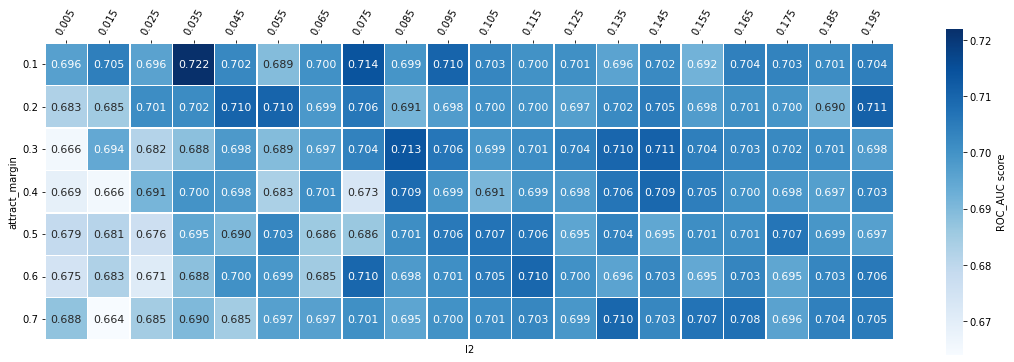

In [66]:
attract_repel_results_roc_50 = attract_repel_results_we.loc[attract_repel_results_we['batch_size']==50, ['attract_margin','l2','roc_score']]
attract_repel_results_roc_50 = attract_repel_results_roc_50.pivot(index='attract_margin', columns='l2', values='roc_score')

ax = sns.heatmap(attract_repel_results_roc_50, cmap = "Blues", annot = True, vmin = 0.664, vmax = 0.722, square = True, annot_kws = {"size": 11}, fmt = '.3f', linewidths = .5, cbar_kws = {'label': 'ROC_AUC score'})

# adjust the figure somewhat
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.xticks(rotation=60) 
fig = ax.get_figure()
fig.set_size_inches(19, 6)

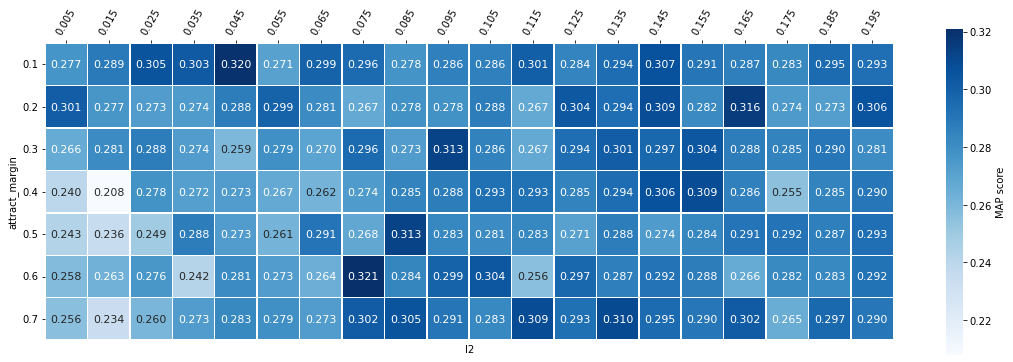

In [68]:
attract_repel_results_map_50 = attract_repel_results_we.loc[attract_repel_results_we['batch_size']==50, ['map_score','l2','attract_margin']]
attract_repel_results_map_50 = attract_repel_results_map_50.pivot(index='attract_margin', columns='l2', values='map_score')

ax = sns.heatmap(attract_repel_results_map_50, cmap = "Blues", annot = True, vmin = 0.208, vmax = 0.321, square = True, annot_kws = {"size": 11}, fmt = '.3f', linewidths = .5, cbar_kws = {'label': 'MAP score'})

# adjust the figure somewhat
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.xticks(rotation=60) 
fig = ax.get_figure()
fig.set_size_inches(19, 6)

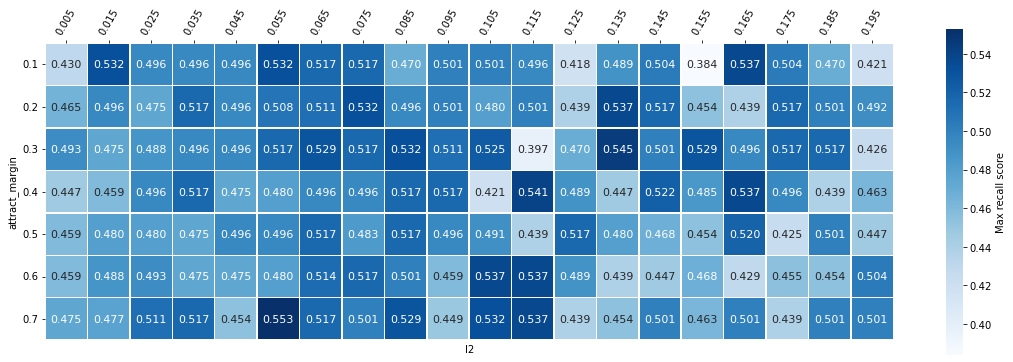

In [70]:
attract_repel_results_re_50 = attract_repel_results_we.loc[attract_repel_results_we['batch_size']==50, ['max_recall','l2','attract_margin']]
attract_repel_results_re_50 = attract_repel_results_re_50.pivot(index='attract_margin', columns='l2', values='max_recall')

ax = sns.heatmap(attract_repel_results_re_50, cmap = "Blues", annot = True, vmin = 0.384, vmax = 0.553, square = True, annot_kws = {"size": 11}, fmt = '.3f', linewidths = .5, cbar_kws = {'label': 'Max recall score'})

# adjust the figure somewhat
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.xticks(rotation=60) 
fig = ax.get_figure()
fig.set_size_inches(19, 6)

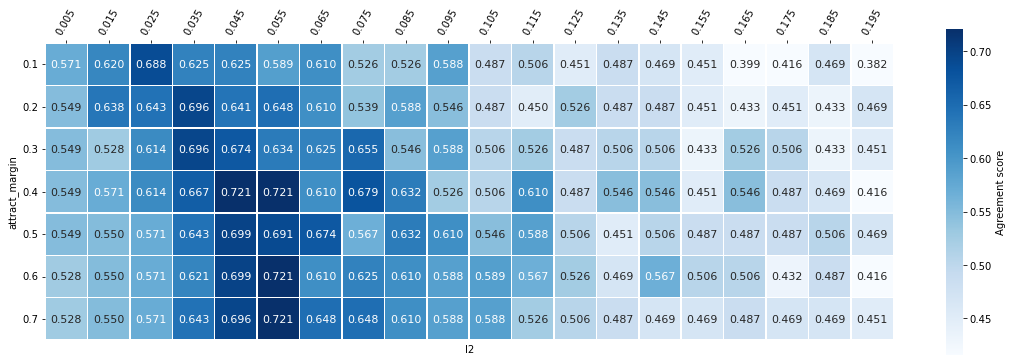

In [7]:
attract_repel_results_agr_50 = attract_repel_results_we.loc[attract_repel_results_we['batch_size']==50, ['agreement','l2','attract_margin']]
attract_repel_results_agr_50 = attract_repel_results_agr_50.pivot(index='attract_margin', columns='l2', values='agreement')

ax = sns.heatmap(attract_repel_results_agr_50, cmap = "Blues", annot = True, vmin = 0.416, vmax = 0.721, square = True, annot_kws = {"size": 11}, fmt = '.3f', linewidths = .5, cbar_kws = {'label': 'Agreement score'})

# adjust the figure somewhat
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.xticks(rotation=60) 
fig = ax.get_figure()
fig.set_size_inches(19, 6)

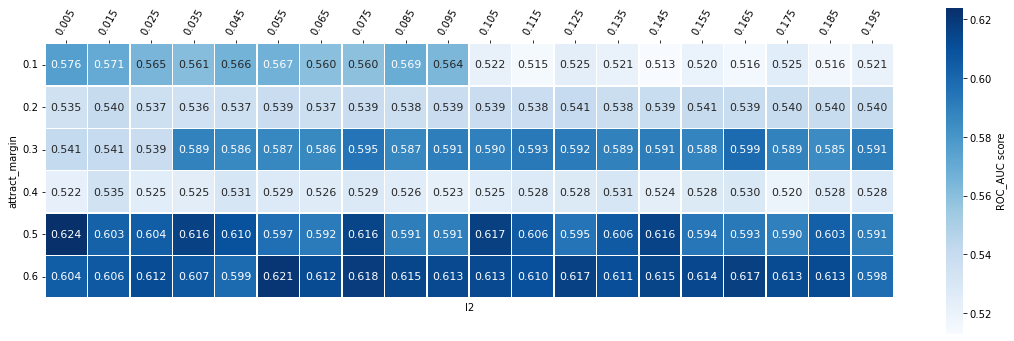

In [67]:
attract_repel_results_random_roc_550 = attract_repel_results_random.loc[attract_repel_results_random['batch_size']==550, ['attract_margin','l2','roc_score']]
attract_repel_results_random_roc_550 = attract_repel_results_random_roc_550.pivot(index='attract_margin', columns='l2', values='roc_score')

ax = sns.heatmap(attract_repel_results_random_roc_550, cmap = "Blues", annot = True, vmin = 0.513, vmax = 0.624, square = True, annot_kws = {"size": 11}, fmt = '.3f', linewidths = .5, cbar_kws = {'label': 'ROC_AUC score'})

# adjust the figure somewhat
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.xticks(rotation=60) 
fig = ax.get_figure()
fig.set_size_inches(19, 6)

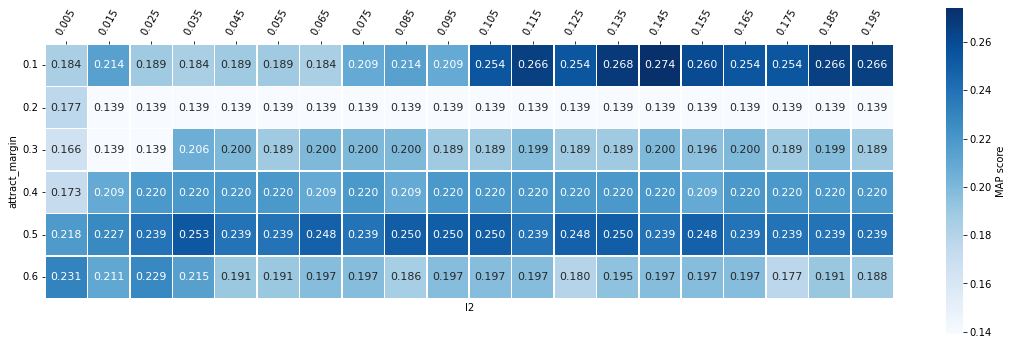

In [69]:
attract_repel_results_random_map_550 = attract_repel_results_random.loc[attract_repel_results_random['batch_size']==550, ['map_score','l2','attract_margin']]
attract_repel_results_random_map_550 = attract_repel_results_random_map_550.pivot(index='attract_margin', columns='l2', values='map_score')

ax = sns.heatmap(attract_repel_results_random_map_550, cmap = "Blues", annot = True, vmin = 0.139, vmax = 0.274, square = True, annot_kws = {"size": 11}, fmt = '.3f', linewidths = .5, cbar_kws = {'label': 'MAP score'})

# adjust the figure somewhat
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.xticks(rotation=60) 
fig = ax.get_figure()
fig.set_size_inches(19, 6)

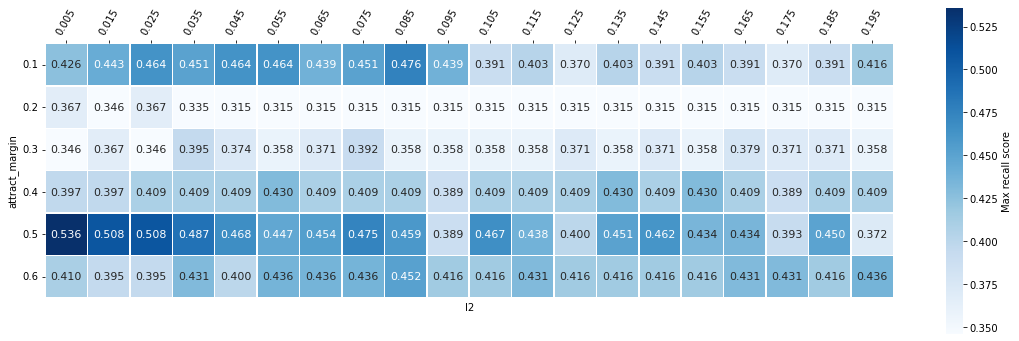

In [71]:
attract_repel_results_random_re_50 = attract_repel_results_random.loc[attract_repel_results_random['batch_size']==550, ['max_recall','l2','attract_margin']]
attract_repel_results_random_re_50 = attract_repel_results_random_re_50.pivot(index='attract_margin', columns='l2', values='max_recall')

ax = sns.heatmap(attract_repel_results_random_re_50, cmap = "Blues", annot = True, vmin = 0.346, vmax = 0.536, square = True, annot_kws = {"size": 11}, fmt = '.3f', linewidths = .5, cbar_kws = {'label': 'Max recall score'})

# adjust the figure somewhat
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.xticks(rotation=60) 
fig = ax.get_figure()
fig.set_size_inches(19, 6)

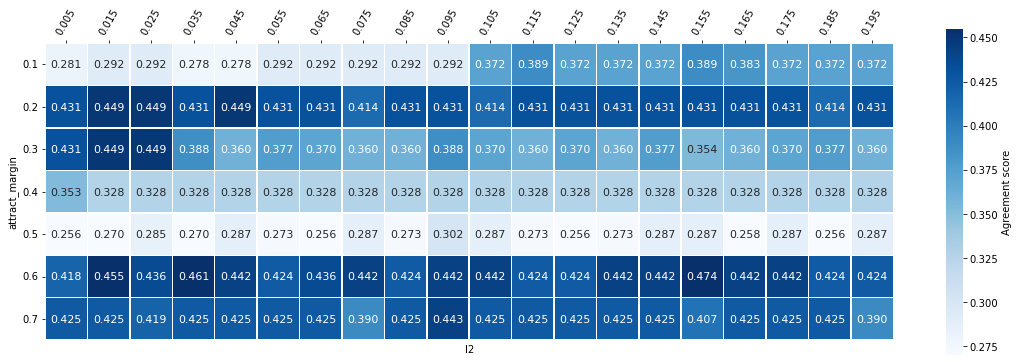

In [8]:
attract_repel_results_random_agr_550 = attract_repel_results_random.loc[attract_repel_results_random['batch_size']==550, ['agreement','l2','attract_margin']]
attract_repel_results_random_agr_550 = attract_repel_results_random_agr_550.pivot(index='attract_margin', columns='l2', values='agreement')

ax = sns.heatmap(attract_repel_results_random_agr_550, cmap = "Blues", annot = True, vmin = 0.27, vmax = 0.455, square = True, annot_kws = {"size": 11}, fmt = '.3f', linewidths = .5, cbar_kws = {'label': 'Agreement score'})

# adjust the figure somewhat
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.xticks(rotation=60) 
fig = ax.get_figure()
fig.set_size_inches(19, 6)

## Intrinsic and extrinsic evaluation of models

In [4]:
attract_repel_we = 'attract-repel/results/grid_search/attract-margin-0.7-batch-size-50-l2-0.055.txt'
attract_repel_random = 'attract-repel/results/grid_search/attract-margin-0.6-batch-size-550-l2-0.155_random.txt'
word_embeddings = 'attract-repel/word-vectors/init_google_we.txt'


attract_repel_we_skills = read_vectors(attract_repel_we)
attract_repel_random_skills = read_vectors(attract_repel_random)
word_embeddings_skills = read_vectors(word_embeddings)
attract_repel_we_skills

vector
id                                                                                          
develop_codified_movements                 [-0.037986, 0.00822, -0.007764, 0.084978, -0.0...
encourage_teambuilding                     [-0.034742, 0.054083, 0.055992, 0.103413, -0.0...
provide_medication_information             [-0.057865, 0.031053, -0.059037, 0.068592, -0....
tend_to_passenger_belongings               [0.057138, 0.030414, -0.02147, 0.017492, -0.00...
meet_productivity_targets                  [-0.049866, 0.040351, 0.039062, 0.025189, -0.0...
...                                                                                      ...
perform_body_wrapping                      [-0.106293, 0.121036, -0.043254, 0.019902, -0....
diagnose_aquatic_animals_disease_symptoms  [-0.045366, 0.137346, -0.02504, 0.045833, -0.1...
apply_thermotherapy                        [-0.022861, 0.106854, 0.011673, 0.018312, -0.0...
hydrocarbon_cracking_techniques            [0.000499, 0.088882, -0.001144, 0.014836, -0.1...
coordinate_security                        [-0.083632, -0.006061, -0.019345, 0.02361, -0....

[13244 rows x 1 columns]

In [6]:
gold_standard = pd.read_excel('resources/20210318/sim_jobs_with_skills.xlsx', dtype=str)
gold_standard_jobs = gold_standard['id'].tolist()

gold_standard_dict = {}
for i, row in gold_standard.iterrows():
    query_id = row['id']
    similar_jobs = row.filter(regex=("sim.*")).dropna().tolist()
    gold_standard_jobs.extend(similar_jobs)
    gold_standard_dict[query_id] = similar_jobs

gold_standard_df = pd.DataFrame([gold_standard_dict]).transpose().reset_index()
gold_standard_df.rename(columns={0:'recs', 'index':'job'}, inplace=True)
gold_standard_df.set_index('job', inplace=True)
gold_standard_jobs = list(set(gold_standard_jobs))

companyDataset = pd.read_excel('resources/company_profiles_with_skills.xlsx')
companyDataset['po_id'] = companyDataset['po_id'].astype(str)
companyDataset = companyDataset[companyDataset['po_id'].isin(gold_standard_jobs)]
companyDataset.set_index('po_id', inplace=True)
companyDataset['skills'] = companyDataset['skills'].apply(literal_eval)
companyDataset['skills'] = companyDataset['skills'].apply(lambda x: [word.replace(' ', '_') for word in x])

skills_annotated_sample = pd.read_excel('resources/annotated_skills_siblings.xlsx')

roc_auc_args = {"threshold_scores":[{'threshold': 0.8, 'score': 1.0},
{'threshold': 0.75, 'score': 0.75},
{'threshold': 0.65, 'score': 0.5},
{'threshold': 0.6, 'score': 0.25}]}

In [7]:
attract_repel_we_results = grid_search_evaluation.get_metrics(attract_repel_we_skills, companyDataset, gold_standard_df, gold_standard_dict, skills_annotated_sample, roc_auc_args)
attract_repel_we_pred = attract_repel_we_results[0]['predictions']
attract_repel_we_metrics = list(attract_repel_we_results[1:])
attract_repel_we_metrics.append(attract_repel_we_results[0]['roc_auc'])

attract_repel_random_results = grid_search_evaluation.get_metrics(attract_repel_random_skills, companyDataset, gold_standard_df, gold_standard_dict, skills_annotated_sample, roc_auc_args)
attract_repel_random_pred = attract_repel_random_results[0]['predictions']
attract_repel_random_metrics = list(attract_repel_random_results[1:])
attract_repel_random_metrics.append(attract_repel_random_results[0]['roc_auc'])

word_embeddings_results = grid_search_evaluation.get_metrics(word_embeddings_skills, companyDataset, gold_standard_df, gold_standard_dict, skills_annotated_sample, roc_auc_args)
word_embeddings_pred = word_embeddings_results[0]['predictions']
word_embeddings_metrics = list(word_embeddings_results[1:])
word_embeddings_metrics.append(word_embeddings_results[0]['roc_auc'])

get raw similarities
jobs have 208 different skills
topic similarity filtered from (13244, 13244) to (208, 208) size
applying thresholding
[0.6  0.65 0.75 0.8 ]
[0.   0.25 0.5  0.75 1.  ]
get raw similarities
jobs have 208 different skills
topic similarity filtered from (13244, 13244) to (208, 208) size
applying thresholding
[0.6  0.65 0.75 0.8 ]
[0.   0.25 0.5  0.75 1.  ]
get raw similarities
jobs have 208 different skills
topic similarity filtered from (13245, 13245) to (208, 208) size
applying thresholding
[0.6  0.65 0.75 0.8 ]
[0.   0.25 0.5  0.75 1.  ]


In [8]:
dfExactMatchingSim = pd.DataFrame(columns=companyDataset.index, index=companyDataset.index)
for job in companyDataset.index:
    job_similarity = companyDataset['skills'].apply(lambda x: len(set(companyDataset.loc[job]['skills']) & set(x)))
    dfExactMatchingSim.loc[job] = job_similarity

dfExactMatchingSim = dfExactMatchingSim.div(dfExactMatchingSim.max(axis=1), axis=0)

roc_score = grid_search_evaluation.measureperformance(dfExactMatchingSim, gold_standard_df)
map_score, map_thresh, max_recall, recall_thresh = grid_search_evaluation.get_map_score(dfExactMatchingSim, gold_standard_dict)
exact_matching_results = [map_score, map_thresh, max_recall, recall_thresh, None, roc_score['roc_auc']]


In [9]:
model_comparison = pd.DataFrame([attract_repel_we_metrics, attract_repel_random_metrics, word_embeddings_metrics, exact_matching_results], 
        columns =['map_score', 'map_thresh', 'max_recall', 'recall_thresh', 'agreement','roc_score'])

model_comparison.index = ['attract repel on we', 'attract repel on random', 'word embeddings', 'exact matching']
model_comparison

map_score  map_thresh  max_recall  recall_thresh  \
attract repel on we       0.324740         0.6    0.516667            0.0   
attract repel on random   0.197396         0.8    0.454167            0.0   
word embeddings           0.314063         0.6    0.436458            0.0   
exact matching            0.288356         0.2    0.330208            0.0   

                         agreement  roc_score  
attract repel on we       0.850000   0.692301  
attract repel on random   0.450000   0.579508  
word embeddings           0.533333   0.704229  
exact matching                 NaN   0.579060

In [81]:
a_r_thresh = 0.6

for job in gold_standard_dict.keys():
    job_preds = attract_repel_pred[attract_repel_pred['job']==job].sort_values('similarity', ascending=False)
    similar_jobs_ids = job_preds[job_preds['similarity']>a_r_thresh]['rec_job'].values

    job_details = companyDataset.loc[job]
    print(f'initial job: {job_details["po_name"]}, skills: {job_details["skills"]}')
    print(f'predicted similar jobs: {len(similar_jobs_ids)}')
    print("Predicted jobs: \n")
    for pred_job in similar_jobs_ids:
        print(companyDataset.loc[pred_job,"po_name"])
        print(companyDataset.loc[pred_job,"skills"])
        print(job_preds.loc[job_preds['rec_job']==pred_job, "similarity"])
    
    print("\n\n")

initial job: Küchenorganisation, skills: ['act_discreetly', 'assess_environmental_impact', 'carry_out_environmental_audits', 'manage_environmental_management_system']
predicted similar jobs: 1
Predicted jobs: 

Key-Account-Manager PV
['assess_environmental_impact', 'carry_out_environmental_audits', 'manage_environmental_management_system']
44    0.875
Name: similarity, dtype: float64



initial job: Konstruktion Kundenprojektabwicklung, skills: ['oversee_construction_project', 'manage_contracts', 'inspect_project_regulations', 'advise_on_irrigation_projects', 'develop_technological_improvement_strategies', 'integrate_building_requirements_of_clients_in_the_architectural_design']
predicted similar jobs: 1
Predicted jobs: 

Konstruktion Kundenprojektabwicklung
['communicate_regulations', 'review_construction_projects', 'create_designs_for_pipeline_engineering', 'integrate_building_requirements_of_clients_in_the_architectural_design', 'ensure_compliance_with_construction_project_deadline'

In [82]:
a_r_thresh = 0.6

for job in gold_standard_dict.keys():
    job_preds = word_embeddings_pred[word_embeddings_pred['job']==job].sort_values('similarity', ascending=False)
    similar_jobs_ids = job_preds[job_preds['similarity']>a_r_thresh]['rec_job'].values

    job_details = companyDataset.loc[job]
    print(f'initial job: {job_details["po_name"]}, skills: {job_details["skills"]}')
    print(f'predicted similar jobs: {len(similar_jobs_ids)}')
    print("Predicted jobs: \n")
    for pred_job in similar_jobs_ids:
        print(companyDataset.loc[pred_job,"po_name"])
        print(companyDataset.loc[pred_job,"skills"])
        print(job_preds.loc[job_preds['rec_job']==pred_job, "similarity"])
    
    print("\n\n")
    # companyDataset.loc[job_preds[job_preds['similarity']>a_r_thresh]['rec_job'].values]

initial job: Küchenorganisation, skills: ['act_discreetly', 'assess_environmental_impact', 'carry_out_environmental_audits', 'manage_environmental_management_system']
predicted similar jobs: 2
Predicted jobs: 

Key-Account-Manager PV
['assess_environmental_impact', 'carry_out_environmental_audits', 'manage_environmental_management_system']
44    0.875
Name: similarity, dtype: float64
Serviceleiter
['maintain_operational_standards', 'disseminate_general_corporate_information', 'monitor_logging_operations', 'implement_corporate_governance']
24    0.625
Name: similarity, dtype: float64



initial job: Konstruktion Kundenprojektabwicklung, skills: ['oversee_construction_project', 'manage_contracts', 'inspect_project_regulations', 'advise_on_irrigation_projects', 'develop_technological_improvement_strategies', 'integrate_building_requirements_of_clients_in_the_architectural_design']
predicted similar jobs: 2
Predicted jobs: 

Konstruktion Kundenprojektabwicklung
['communicate_regulations', 

## Annotations of skills

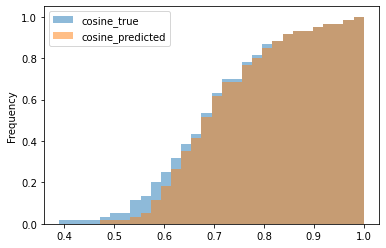

In [83]:
def plot_cimulative_density_hist(skills_annotated_sample, attract_repel_skills):

    skills_annotated_sample['orig_skill_we'] = skills_annotated_sample['orig_skill'].apply(lambda x: attract_repel_skills.loc[x])
    skills_annotated_sample['skill1_we'] = skills_annotated_sample['skill_1'].apply(lambda x: attract_repel_skills.loc[x])
    skills_annotated_sample['skill2_we'] = skills_annotated_sample['skill_2'].apply(lambda x: attract_repel_skills.loc[x])
    skills_annotated_sample['cosine1'] = skills_annotated_sample.apply(lambda x: calc_cosine(x['orig_skill_we'], x['skill1_we']), axis=1)
    skills_annotated_sample['cosine2'] = skills_annotated_sample.apply(lambda x: calc_cosine(x['orig_skill_we'], x['skill2_we']), axis=1)
    skills_annotated_sample['similar_skill'] = skills_annotated_sample.apply(lambda x: x['skill_1'] if x['cosine1']>x['cosine2'] else x['skill_2'], axis=1)

    skills_annotated_sample['cosine_predicted'] = skills_annotated_sample.apply(lambda x: x['cosine1'] if x['skill_1']==x['similar_skill'] else x['cosine2'], axis=1)

    skills_annotated_sample['cosine_true'] = skills_annotated_sample.apply(lambda x: x['cosine1'] if x['skill_1']==x['Similar annotation'] else x['cosine2'], axis=1)

    skills_annotated_sample[['cosine_true', 'cosine_predicted']].plot.hist(bins=30, alpha=0.5, density=True, cumulative=True)


plot_cimulative_density_hist(skills_annotated_sample, attract_repel_we_skills)


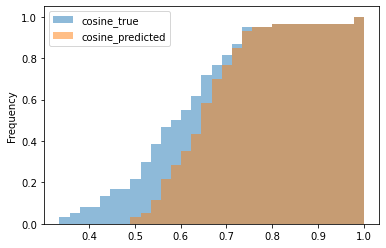

In [84]:
plot_cimulative_density_hist(skills_annotated_sample, word_embeddings_skills)

# K-Means
## Initial word embeddings

In [83]:
def mbkmeans_clusters(X, k, mb, print_silhouette_values):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [87]:
X = [np.array(x) for x in word_embeddings_skills['vector'].to_numpy()]
k = 50

In [88]:
clustering, cluster_labels = mbkmeans_clusters(X, k, 500, True)

For n_clusters = 50
Silhouette coefficient: 0.02
Inertia:5961.909497638178
Silhouette values:
    Cluster 24: Size:51 | Avg:0.63 | Min:0.44 | Max: 0.70
    Cluster 21: Size:2 | Avg:0.52 | Min:0.51 | Max: 0.53
    Cluster 0: Size:2 | Avg:0.35 | Min:0.35 | Max: 0.36
    Cluster 25: Size:76 | Avg:0.27 | Min:0.08 | Max: 0.40
    Cluster 43: Size:25 | Avg:0.10 | Min:-0.00 | Max: 0.21
    Cluster 48: Size:228 | Avg:0.08 | Min:0.01 | Max: 0.19
    Cluster 31: Size:205 | Avg:0.07 | Min:-0.12 | Max: 0.15
    Cluster 38: Size:370 | Avg:0.07 | Min:-0.03 | Max: 0.16
    Cluster 2: Size:425 | Avg:0.04 | Min:-0.07 | Max: 0.13
    Cluster 6: Size:313 | Avg:0.04 | Min:-0.04 | Max: 0.13
    Cluster 29: Size:209 | Avg:0.04 | Min:-0.07 | Max: 0.17
    Cluster 11: Size:302 | Avg:0.03 | Min:-0.20 | Max: 0.14
    Cluster 14: Size:399 | Avg:0.03 | Min:-0.07 | Max: 0.11
    Cluster 3: Size:437 | Avg:0.03 | Min:-0.02 | Max: 0.12
    Cluster 41: Size:232 | Avg:0.03 | Min:-0.02 | Max: 0.13
    Cluster 8: Size:37

In [95]:
word_embeddings_skills['clusters'] = cluster_labels
word_embeddings_skills[word_embeddings_skills['clusters']==25]

vector  \
id                                                                             
javanese                   [0.0082923140996742, 0.0060547060685003, 0.055...   
speak_different_languages  [-0.0071879141104477, -0.0539168467152011, 0.0...   
korean                     [0.025648425173691, 0.0676481293477986, 0.0680...   
persian                    [-0.0054122060230285, 0.0360525136876088, 0.04...   
vietnamese                 [0.0370255963510932, 0.0140597629530551, 0.104...   
...                                                                      ...   
sardinian                  [0.0082923140996742, 0.0060547060685003, 0.055...   
bihari                     [0.0145013400757776, 0.0627694556129521, 0.069...   
english                    [-0.0192550738704179, -0.0351849258252496, 0.0...   
sanskrit                   [0.0836265018872686, -0.0225860907904519, 0.08...   
macedonian                 [0.0082923140996742, 0.0060547060685003, 0.055...   

                           clusters  
id                                   
javanese                         25  
speak_different_languages        25  
korean                           25  
persian                          25  
vietnamese                       25  
...                             ...  
sardinian                        25  
bihari                           25  
english                          25  
sanskrit                         25  
macedonian                       25  

[76 rows x 2 columns]

In [93]:
def print_clusters(df, n, k):
    print("Random samples of terms per cluster:")
    for i in range(k):
        tokens_per_cluster = ""
        most_representative = df[df['clusters']==i].sample(n=n).index
        for t in most_representative:
            tokens_per_cluster += f"{t}, "
        print(f"Cluster {i}: {tokens_per_cluster}")

print_clusters(word_embeddings_skills, 2, 50)

Random samples of terms per cluster:
Cluster 0: conduct_soil_sample_tests, examine_geochemical_samples, 
Cluster 1: use_translation_memory_software, read_books, 
Cluster 2: solve_problems_in_healthcare, lead_technology_development_of_an_organisation, 
Cluster 3: sterilise_workpieces, types_of_foil_printing_machines, 
Cluster 4: fire_protection_engineering, convert_textile_fibres_into_sliver, 
Cluster 5: biosecurity, report_on_building_damage, 
Cluster 6: apply_freinet_teaching_strategies, teach_arts_principles, 
Cluster 7: use_abrasive_wheel, operate_paper_folding_machine, 
Cluster 8: manage_chemical_testing_procedures, dispose_food_waste, 
Cluster 9: plan_geotechnical_investigations_in_the_field, identify_archaeological_finds, 
Cluster 10: aircraft_cargo_capacity, prepare_production_prototypes, 
Cluster 11: check_durability_of_wood_materials, leather_goods_materials, 
Cluster 12: create_manufacturing_guidelines, legal_standards_in_gambling, 
Cluster 13: outdoor_advertising, horse_ridi

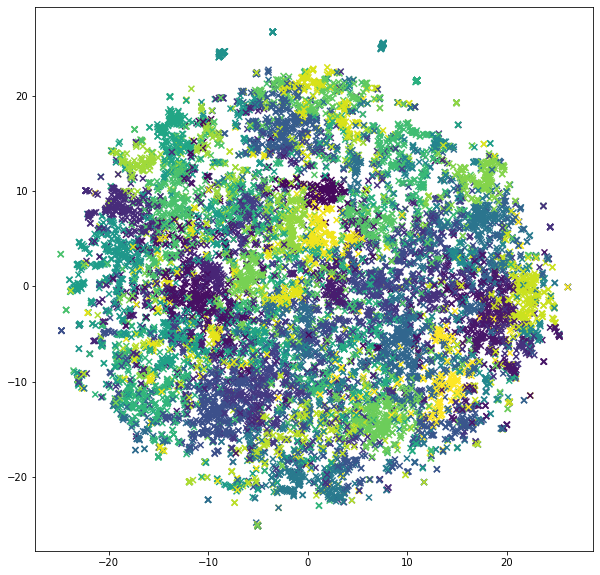

In [94]:
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 10
random_state = 42
model = TSNE(n_components=2, random_state=random_state, init=tsne_init,
    perplexity=tsne_perplexity,
    early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_X = model.fit_transform(X)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(transformed_X[:, 0], transformed_X[:, 1], marker = "x", c = cluster_labels)
plt.show()


## After attract

In [104]:
X = [np.array(x) for x in attract_repel_we_skills['vector'].to_numpy()]
k = 50

clustering, cluster_labels = mbkmeans_clusters(X, k, 500, True)

For n_clusters = 50
Silhouette coefficient: 0.03
Inertia:6085.187297134457
Silhouette values:
    Cluster 43: Size:39 | Avg:0.72 | Min:0.28 | Max: 0.79
    Cluster 8: Size:56 | Avg:0.51 | Min:0.14 | Max: 0.62
    Cluster 39: Size:73 | Avg:0.43 | Min:0.10 | Max: 0.54
    Cluster 26: Size:112 | Avg:0.09 | Min:-0.02 | Max: 0.26
    Cluster 27: Size:324 | Avg:0.09 | Min:0.01 | Max: 0.21
    Cluster 40: Size:154 | Avg:0.06 | Min:-0.01 | Max: 0.17
    Cluster 41: Size:403 | Avg:0.06 | Min:-0.01 | Max: 0.19
    Cluster 47: Size:323 | Avg:0.05 | Min:-0.01 | Max: 0.14
    Cluster 7: Size:199 | Avg:0.05 | Min:-0.12 | Max: 0.14
    Cluster 5: Size:298 | Avg:0.04 | Min:-0.03 | Max: 0.15
    Cluster 48: Size:104 | Avg:0.04 | Min:-0.02 | Max: 0.18
    Cluster 0: Size:336 | Avg:0.04 | Min:-0.01 | Max: 0.12
    Cluster 14: Size:421 | Avg:0.04 | Min:-0.03 | Max: 0.12
    Cluster 42: Size:169 | Avg:0.04 | Min:-0.01 | Max: 0.12
    Cluster 34: Size:168 | Avg:0.04 | Min:-0.06 | Max: 0.16
    Cluster 11: S

In [105]:
attract_repel_we_skills['clusters'] = cluster_labels
attract_repel_we_skills[attract_repel_we_skills['clusters']==43]

vector  \
id                                                                                        
lisp                                  [0.00653, -0.01121, 0.067995, 0.096753, -0.073...   
matlab                                [-0.0141, -0.02095, 0.072353, 0.100181, -0.054...   
statistical_analysis_system_software  [0.004203, -0.084715, 0.044312, 0.044787, -0.0...   
objective-c                           [-0.00745, -0.013529, 0.081661, 0.098115, -0.0...   
javascript                            [0.005396, -0.035564, 0.063889, 0.097873, -0.0...   
coffeescript                          [0.009329, -0.029049, 0.086272, 0.085333, -0.0...   
scratch_(computer_programming)        [0.000572, -0.025672, 0.078571, 0.088866, -0.0...   
ajax                                  [-0.002981, -0.01503, 0.073187, 0.093841, -0.0...   
typescript                            [0.026547, -0.031444, 0.06756, 0.097494, -0.05...   
openedge_advanced_business_language   [-0.001205, -0.019052, 0.075753, 0.090564, -0....   
php                                   [0.006623, -0.026988, 0.079572, 0.091561, -0.0...   
scala                                 [0.000466, -0.023542, 0.071597, 0.094347, -0.0...   
prolog_(computer_programming)         [-0.006589, -0.036131, 0.088647, 0.104737, -0....   
sap_r3                                [0.018224, -0.006301, 0.073339, 0.095301, -0.0...   
python_(computer_programming)         [0.01019, -0.016169, 0.066611, 0.085675, -0.05...   
web_programming                       [0.051657, -0.017119, 0.034101, 0.074346, -0.0...   
groovy                                [0.022958, -0.028667, 0.074753, 0.093088, -0.0...   
visual_studio_.net                    [0.023465, -0.032442, 0.06786, 0.083438, -0.07...   
apl                                   [-0.001613, -0.018819, 0.066533, 0.095539, -0....   
erlang                                [0.010248, -0.025742, 0.073237, 0.096663, -0.0...   
sas_language                          [-0.0141, -0.034127, 0.070909, 0.097078, -0.06...   
perl                                  [0.009941, -0.018476, 0.057264, 0.101926, -0.0...   
swift_(computer_programming)          [0.012731, -0.012242, 0.079507, 0.098103, -0.0...   
c++                                   [-0.013372, -0.024769, 0.083354, 0.104479, -0....   
asp.net                               [0.007856, -0.036797, 0.05713, 0.072821, -0.05...   
ruby_(computer_programming)           [-0.007653, -0.01774, 0.075315, 0.091293, -0.0...   
pascal_(computer_programming)         [-0.00081, -0.016865, 0.074972, 0.096895, -0.0...   
assembly_(computer_programming)       [0.029551, -0.020678, 0.085457, 0.092275, -0.0...   
abap                                  [-0.006062, -0.019569, 0.078981, 0.095129, -0....   
haskell                               [0.007259, -0.01809, 0.080855, 0.092393, -0.06...   
computer_programming                  [-0.005113, -0.019054, 0.062704, 0.10138, -0.1...   
vbscript                              [0.01222, -0.026944, 0.076353, 0.098438, -0.06...   
ml_(computer_programming)             [-0.019031, -0.009399, 0.072645, 0.08222, -0.0...   
smalltalk_(computer_programming)      [-0.000466, -0.015599, 0.077174, 0.097829, -0....   
r                                     [-0.019835, -0.024016, 0.060292, 0.076299, -0....   
java_(computer_programming)           [-0.00491, -0.036018, 0.050143, 0.103687, -0.0...   
common_lisp                           [0.017339, -0.020565, 0.075593, 0.107915, -0.0...   
c#                                    [-0.009939, -0.014327, 0.080834, 0.09254, -0.0...   
cobol                                 [0.001443, -0.019141, 0.073272, 0.091626, -0.0...   

                                      clusters  
id                                              
lisp                                        43  
matlab                                      43  
statistical_analysis_system_software        43  
objective-c                                 43  
javascript                                  43  
coffee

In [100]:
print_clusters(attract_repel_we_skills, 5, 50)

Random samples of terms per cluster:
Cluster 0: process_man-made_fibres, prepare_films_for_printing_plates, apply_footwear_finishing_techniques, deburring_processes, tend_injection_moulding_machine, 
Cluster 1: propose_improvements_to_artistic_production, adapt_instruction_to_labour_market, practice_innovative_thinking_in_the_footwear_and_leather_goods_industries, job_market_offers, participate_in_sport_events, 
Cluster 2: office_equipment, good_laboratory_practice, wood_products, legal_requirements_in_the_social_sector, develop_documentation_in_accordance_with_legal_requirements, 
Cluster 3: perform_test_run, follow-up_on_healthcare_users'_treatment, use_methods_of_logistical_data_analysis, collect_healthcare_user's_general_data, perform_escalation_procedure, 
Cluster 4: cargo_industry, ensure_accurate_screening_of_luggage_in_aerodromes, coordinate_road_haulage_operations, follow_switching_instructions_in_rail_operations, ensure_correct_signalling_during_rail_maintenance, 
Cluster 5: 

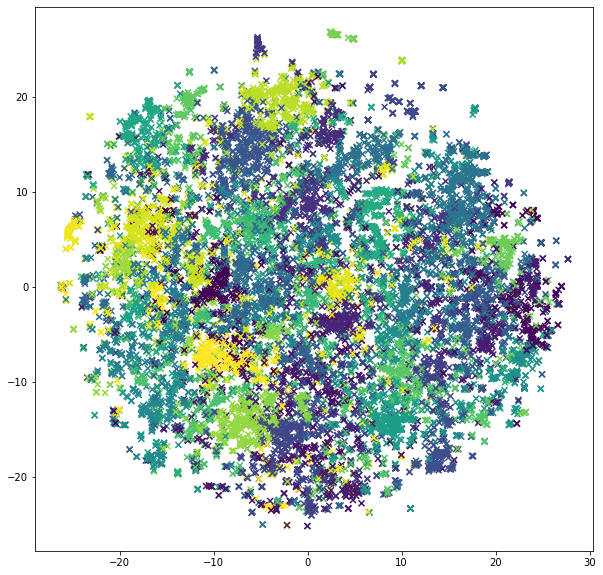

In [106]:
transformed_X = model.fit_transform(X)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(transformed_X[:, 0], transformed_X[:, 1], marker = "x", c = cluster_labels)
plt.show()

In [52]:
for k in range(3, 100):
    clustering, cluster_labels = mbkmeans_clusters(X, k, 500, True)

 6: Size:22 | Avg:0.12 | Min:-0.03 | Max: 0.21
    Cluster 48: Size:47 | Avg:0.10 | Min:-0.06 | Max: 0.21
    Cluster 34: Size:67 | Avg:0.09 | Min:-0.08 | Max: 0.24
    Cluster 81: Size:18 | Avg:0.09 | Min:-0.07 | Max: 0.16
    Cluster 23: Size:61 | Avg:0.08 | Min:-0.13 | Max: 0.25
    Cluster 46: Size:55 | Avg:0.07 | Min:0.01 | Max: 0.15
    Cluster 66: Size:35 | Avg:0.07 | Min:-0.06 | Max: 0.21
    Cluster 65: Size:67 | Avg:0.07 | Min:-0.07 | Max: 0.19
    Cluster 37: Size:52 | Avg:0.06 | Min:-0.09 | Max: 0.16
    Cluster 31: Size:65 | Avg:0.06 | Min:-0.07 | Max: 0.13
    Cluster 14: Size:77 | Avg:0.05 | Min:-0.12 | Max: 0.21
    Cluster 53: Size:66 | Avg:0.03 | Min:-0.12 | Max: 0.19
    Cluster 26: Size:74 | Avg:0.03 | Min:-0.06 | Max: 0.10
    Cluster 12: Size:107 | Avg:0.03 | Min:-0.11 | Max: 0.14
    Cluster 7: Size:63 | Avg:0.02 | Min:-0.12 | Max: 0.17
    Cluster 9: Size:109 | Avg:0.02 | Min:-0.18 | Max: 0.14
    Cluster 83: Size:94 | Avg:0.01 | Min:-0.12 | Max: 0.08
    Cluste